In [13]:
# by Joh Schoeneberg 2018
# BSD 3-clause licence

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#pyLattice modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# read input data

In [16]:
inputParameters = pd.read_csv(pythonPackagePath+'../../input/imaging_data/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)

print(master_outputDataFolder)

5689.0
output_560


In [11]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
filename = "puncta_01.csv"
data = pd.read_csv(path+"/"+filename,header=0)
data.columns = ["x","y","z","A"]
print(len(data))
data[0:5]

168


,x,y,z,A
0,41.84319,97.23882,2.734540,15185.190
1,88.67713,91.22092,3.158334,30282.550
2,84.49375,52.26753,4.109425,15709.080
3,86.42184,97.71952,3.375700,21657.920
4,89.25303,35.40831,5.080955,9751.059


# plot detected puncta

Text(0.5,0,'Z axis')

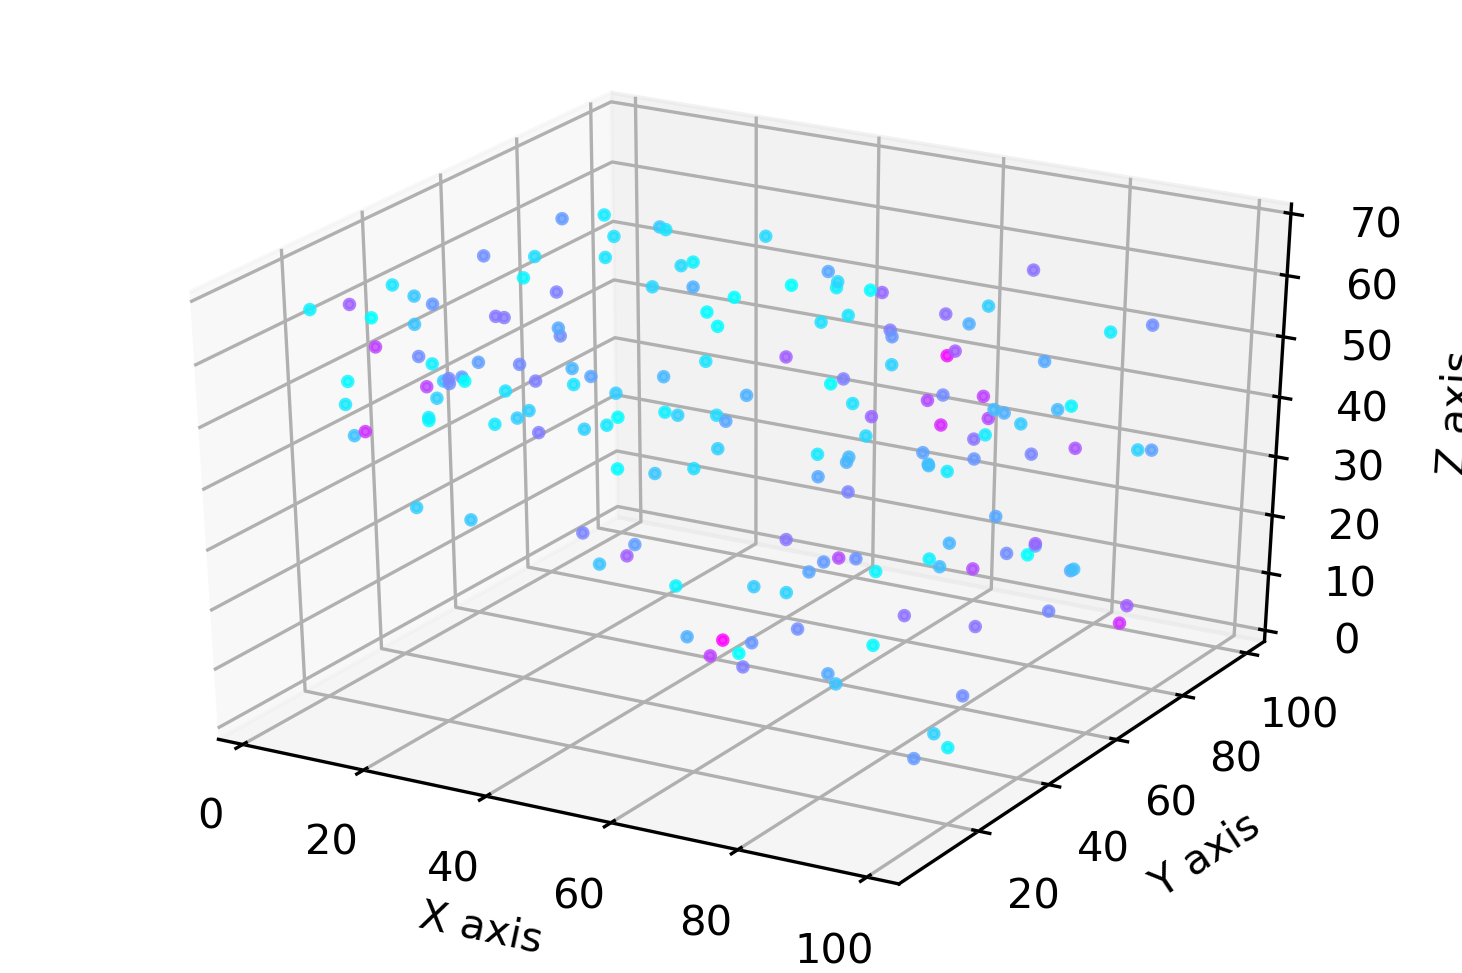

In [34]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
x = data['x'].values[0:100000]
y = data['y'].values[0:100000]
z = data['z'].values[0:100000]
intensity = data['A'].values[0:100000]
ax.scatter3D(x, y, z, c=np.log(intensity), cmap='cool',alpha=0.8,s=5);
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Text(0,0.5,'z')

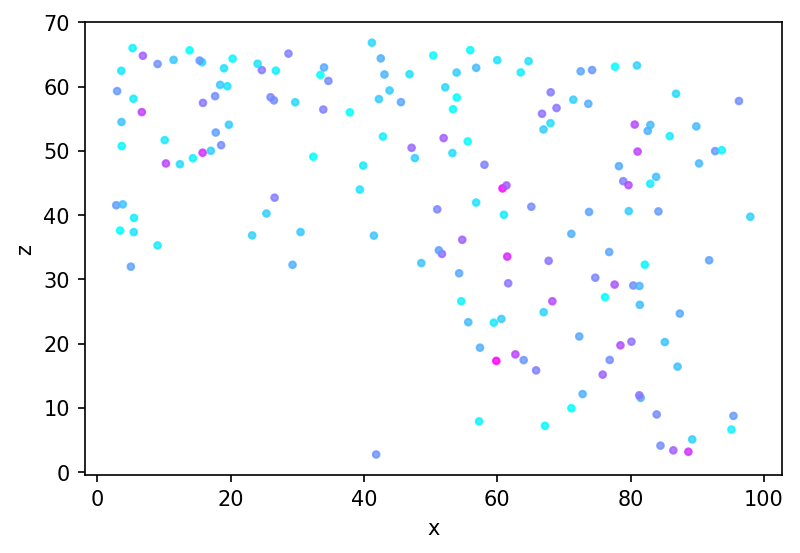

In [38]:
plt.figure(dpi=150)
ax = plt.axes()
x = data['x']
y = data['y']
z = data['z']
intensity = data['A']
ax.scatter(x, z, c=np.log(intensity), cmap='cool',alpha=0.8,s=10);
ax.set_xlabel("x")
ax.set_ylabel("z")

Text(0,0.5,'y')

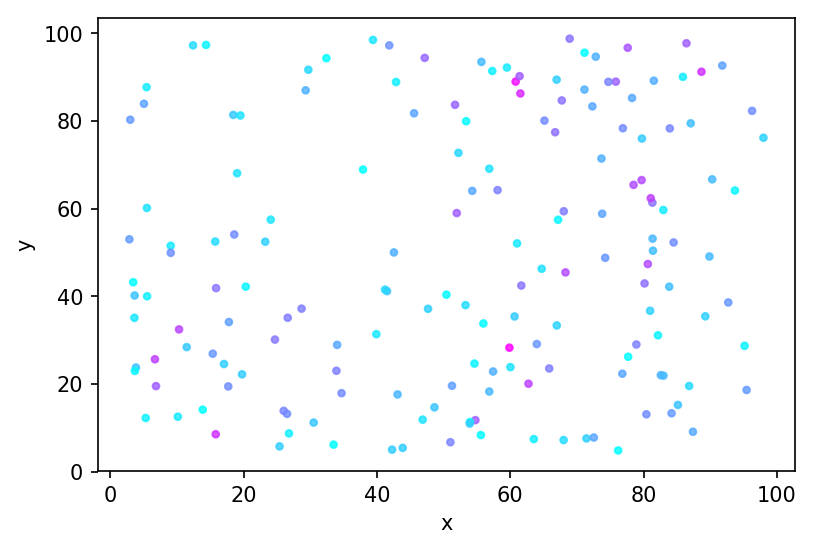

In [46]:
plt.figure(dpi=150)
ax = plt.axes()
ax.scatter(x, y, c=np.log(intensity), cmap='cool',alpha=0.8,s=10);
ax.set_xlabel("x")
ax.set_ylabel("y")

# Write a *.bild file to display the detected puncta in ChimeraX

In [47]:
bildfilename = 'puncta_1.bild'
file = open(path+"/"+bildfilename,'w') 
radius = 1
#.transparency value 
file.write(".transparency 0.5\n")
file.write(".color red\n")
file.write(".dot 0 0 0\n")
#Set the transparency of subsequently defined items. The value can range from 0.0 (not transparent) to 1.0 (completely transparent).
for i in range(0,len(data)):
    dataLine = data.iloc[i].values
    line = ".sphere "+str(dataLine[0])+" "+str(dataLine[1])+" "+str(dataLine[2])+" "+str(radius)+"\n"
    file.write(line)
file.close()

# Plot detection intensity Histogram and plot puncta dependent on their intensity

168 22
Int64Index([  1,   3,  14,  16,  18,  23,  33,  35,  47,  48,  53,  72,  74,
             76,  80,  87,  91,  98, 100, 109, 111, 162],
           dtype='int64')


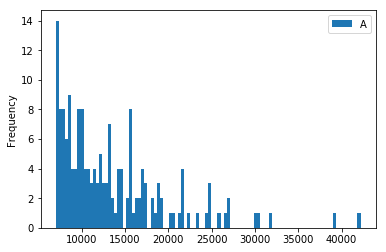

In [59]:
data[['A']].plot.hist(bins=100)
print(len(data['A']),len(idx))
print(idx)

22/168 selected/total numbe of detections


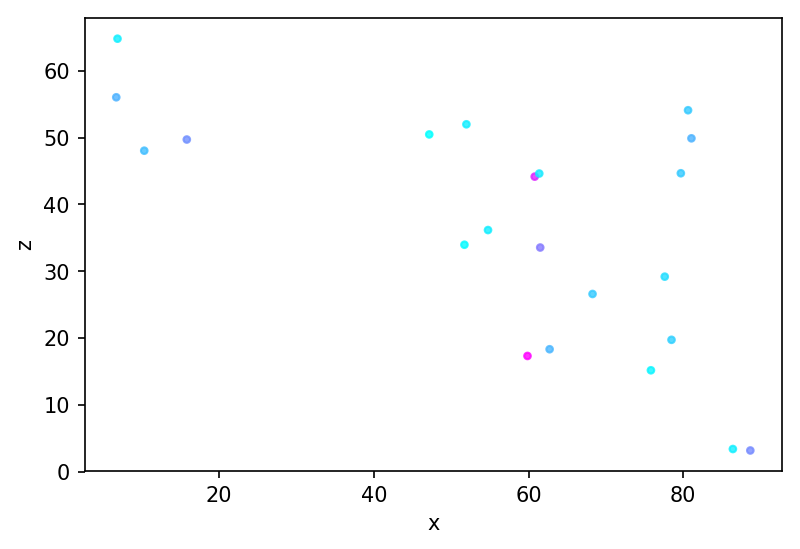

In [57]:
#%matplotlib notebook

idx = data.index[data['A'] > 20000];
print('{}/{} selected/total numbe of detections'.format(len(idx),len(data)));

plt.figure(dpi=150)
ax = plt.axes()
x = ((data['x']).loc[idx]);
y = ((data['y']).loc[idx]);
z = ((data['z']).loc[idx]);
intensity = ((data['A']).loc[idx])
ax.scatter(x, z, c=intensity, cmap='cool',alpha=0.8,s=10);
ax.set_xlabel("x");
ax.set_ylabel("z");


